In [18]:
# This notebook analyses the ouput of 
# running complexity.py

In [1]:
import sys
import os

sys.path.append("../")
# ! pip install -r ../../../requirements.txt
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint
from preprocessing.ProcessRaw import ProcessRaw
import pandas as pd

In [2]:
city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

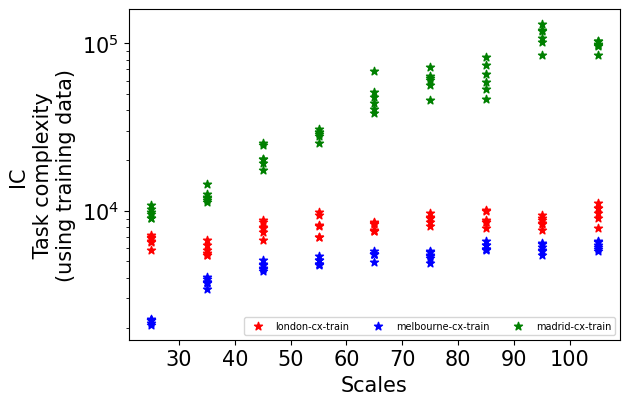

In [21]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    

    for CSR_type in [
    'CSR_PM_sum_y_exceeding_r_x_max',
        ]:

        cityname = city.lower()

        city_label_printed = []      
        for run_count in range(1, 7):
            os.system("grep \'for_parser:\' stochasticity_N_500_cx/complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_" + str(run_count) + ".txt | sed \"s/for_parser:,//g\" > stochasticity_N_500_cx/parsed_file.csv")
            df = pd.read_csv("stochasticity_N_500_cx/parsed_file.csv", names=["cityname","i_o_length","prediction_horizon","grid_size","thresh","config_cx_sample_whole_data","CSR_MP_no_thresh_mean","CSR_MP_no_thresh_median","CSR_MP_count_y_exceeding_r_x","CSR_MP_sum_y_exceeding_r_x_max","CSR_MP_sum_y_exceeding_r_x_mean","CSR_MP_sum_exp_y_exceeding_r_x_mean","CSR_MP_no_thresh_frac_mean_2","CSR_MP_no_thresh_frac_mean_2_exp","CSR_MP_no_thresh_frac_sum","CSR_PM_no_thresh_mean","CSR_PM_no_thresh_median","CSR_PM_count_y_exceeding_r_x","CSR_PM_sum_y_exceeding_r_x_max","CSR_PM_sum_y_exceeding_r_x_mean","CSR_PM_sum_exp_y_exceeding_r_x_mean","CSR_PM_no_thresh_frac_mean_2","CSR_PM_no_thresh_frac_mean_2_exp","CSR_PM_no_thresh_frac_sum","CSR_NM_no_thresh_mean","CSR_NM_no_thresh_median","CSR_NM_count_y_exceeding_r_x","CSR_NM_sum_y_exceeding_r_x_max","CSR_NM_sum_y_exceeding_r_x_mean","CSR_NM_sum_exp_y_exceeding_r_x_mean","CSR_NM_no_thresh_frac_mean_2","CSR_NM_no_thresh_frac_mean_2_exp","CSR_NM_no_thresh_frac_sum","CSR_GB_no_thresh_mean","CSR_GB_no_thresh_median","CSR_GB_count_y_exceeding_r_x","CSR_GB_sum_y_exceeding_r_x_max","CSR_GB_sum_y_exceeding_r_x_mean","CSR_GB_sum_exp_y_exceeding_r_x_mean","CSR_GB_no_thresh_frac_mean_2","CSR_GB_no_thresh_frac_mean_2_exp","CSR_GB_no_thresh_frac_sum", "CSR_GB_red_by_grey_sum","CSR_NM_red_by_grey_sum","CSR_PM_red_by_grey_sum","CSR_MP_red_by_grey_sum"])        

            for scale in config.scales[::-1]:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only one star even if multiple present, uncomment below:
                        range_ = [0]

                        for i in range_:
                            if cityname in city_label_printed:
                                plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',color=city_color[cityname], alpha=1)
                            else:
                                plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                                city_label_printed.append(cityname)                            

plt.xlabel("Scales", fontsize=15)
plt.ylabel("IC \n Task complexity \n(using training data)", fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
plt.tight_layout()
plt.gca().set_aspect(30)
plt.savefig("cx-stochasticity.png")
plt.show()





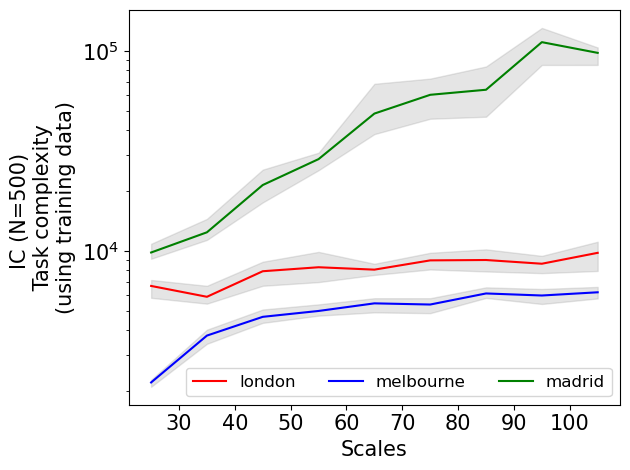

In [35]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    

    for CSR_type in [
    'CSR_PM_sum_y_exceeding_r_x_max',
        ]:

        cityname = city.lower()

        city_label_printed = []      
        
        for_mean = []
        for run_count in range(1, 7):
            x_axis = []
            y_axis = []
            os.system("grep \'for_parser:\' stochasticity_N_500_cx/complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_" + str(run_count) + ".txt | sed \"s/for_parser:,//g\" > stochasticity_N_500_cx/parsed_file.csv")
            df = pd.read_csv("stochasticity_N_500_cx/parsed_file.csv", names=["cityname","i_o_length","prediction_horizon","grid_size","thresh","config_cx_sample_whole_data","CSR_MP_no_thresh_mean","CSR_MP_no_thresh_median","CSR_MP_count_y_exceeding_r_x","CSR_MP_sum_y_exceeding_r_x_max","CSR_MP_sum_y_exceeding_r_x_mean","CSR_MP_sum_exp_y_exceeding_r_x_mean","CSR_MP_no_thresh_frac_mean_2","CSR_MP_no_thresh_frac_mean_2_exp","CSR_MP_no_thresh_frac_sum","CSR_PM_no_thresh_mean","CSR_PM_no_thresh_median","CSR_PM_count_y_exceeding_r_x","CSR_PM_sum_y_exceeding_r_x_max","CSR_PM_sum_y_exceeding_r_x_mean","CSR_PM_sum_exp_y_exceeding_r_x_mean","CSR_PM_no_thresh_frac_mean_2","CSR_PM_no_thresh_frac_mean_2_exp","CSR_PM_no_thresh_frac_sum","CSR_NM_no_thresh_mean","CSR_NM_no_thresh_median","CSR_NM_count_y_exceeding_r_x","CSR_NM_sum_y_exceeding_r_x_max","CSR_NM_sum_y_exceeding_r_x_mean","CSR_NM_sum_exp_y_exceeding_r_x_mean","CSR_NM_no_thresh_frac_mean_2","CSR_NM_no_thresh_frac_mean_2_exp","CSR_NM_no_thresh_frac_sum","CSR_GB_no_thresh_mean","CSR_GB_no_thresh_median","CSR_GB_count_y_exceeding_r_x","CSR_GB_sum_y_exceeding_r_x_max","CSR_GB_sum_y_exceeding_r_x_mean","CSR_GB_sum_exp_y_exceeding_r_x_mean","CSR_GB_no_thresh_frac_mean_2","CSR_GB_no_thresh_frac_mean_2_exp","CSR_GB_no_thresh_frac_sum", "CSR_GB_red_by_grey_sum","CSR_NM_red_by_grey_sum","CSR_PM_red_by_grey_sum","CSR_MP_red_by_grey_sum"])        

            for scale in config.scales[::-1]:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only one star even if multiple present, uncomment below:
                        range_ = [0]

                        for i in range_:
                            # if cityname in city_label_printed:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',color=city_color[cityname], alpha=1)
                            # else:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                            #     city_label_printed.append(cityname)                            
                            x_axis.append(scale)                            
                            y_axis.append(filtered_rows.iloc[i][CSR_type] / 500)
            for_mean.append(y_axis)
        mean_y_axis = np.mean(np.array(for_mean), axis=0)
        min_y_axis = np.min(np.array(for_mean), axis=0)
        max_y_axis = np.max(np.array(for_mean), axis=0)        

        plt.plot(x_axis, mean_y_axis, label=cityname , color=city_color[cityname])                 
        # plt.plot(x_axis, max_y_axis)                 
        # plt.plot(x_axis, min_y_axis)  
        plt.fill_between(x_axis, min_y_axis, max_y_axis, alpha=0.2, color="gray")

plt.xlabel("Scales", fontsize=15)
plt.ylabel("IC (N=500) \n Task complexity \n(using training data)", fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", fontsize=12, ncol=3, labelspacing=0.2)
plt.tight_layout()
# plt.gca().set_aspect(30)
plt.savefig("cx-stochasticity.png")
plt.show()





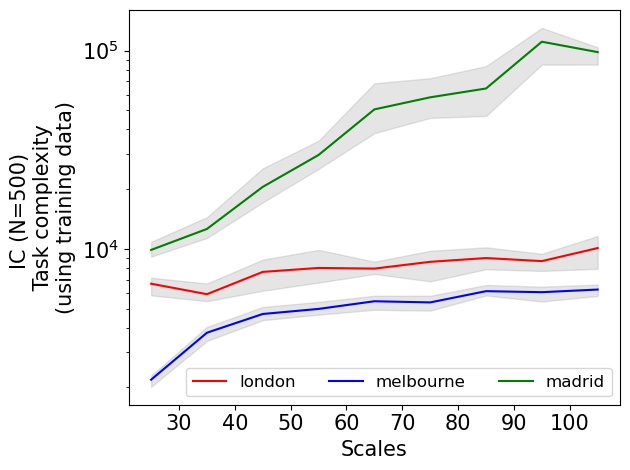

In [37]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    

    for CSR_type in [
    'CSR_PM_sum_y_exceeding_r_x_max',
        ]:

        cityname = city.lower()

        city_label_printed = []      
        
        for_mean = []
        for run_count in range(1, 9):
            x_axis = []
            y_axis = []
            os.system("grep \'for_parser:\' stochasticity_N_500_cx/complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_" + str(run_count) + ".txt | sed \"s/for_parser:,//g\" > stochasticity_N_500_cx/parsed_file.csv")
            df = pd.read_csv("stochasticity_N_500_cx/parsed_file.csv", names=["cityname","i_o_length","prediction_horizon","grid_size","thresh","config_cx_sample_whole_data","CSR_MP_no_thresh_mean","CSR_MP_no_thresh_median","CSR_MP_count_y_exceeding_r_x","CSR_MP_sum_y_exceeding_r_x_max","CSR_MP_sum_y_exceeding_r_x_mean","CSR_MP_sum_exp_y_exceeding_r_x_mean","CSR_MP_no_thresh_frac_mean_2","CSR_MP_no_thresh_frac_mean_2_exp","CSR_MP_no_thresh_frac_sum","CSR_PM_no_thresh_mean","CSR_PM_no_thresh_median","CSR_PM_count_y_exceeding_r_x","CSR_PM_sum_y_exceeding_r_x_max","CSR_PM_sum_y_exceeding_r_x_mean","CSR_PM_sum_exp_y_exceeding_r_x_mean","CSR_PM_no_thresh_frac_mean_2","CSR_PM_no_thresh_frac_mean_2_exp","CSR_PM_no_thresh_frac_sum","CSR_NM_no_thresh_mean","CSR_NM_no_thresh_median","CSR_NM_count_y_exceeding_r_x","CSR_NM_sum_y_exceeding_r_x_max","CSR_NM_sum_y_exceeding_r_x_mean","CSR_NM_sum_exp_y_exceeding_r_x_mean","CSR_NM_no_thresh_frac_mean_2","CSR_NM_no_thresh_frac_mean_2_exp","CSR_NM_no_thresh_frac_sum","CSR_GB_no_thresh_mean","CSR_GB_no_thresh_median","CSR_GB_count_y_exceeding_r_x","CSR_GB_sum_y_exceeding_r_x_max","CSR_GB_sum_y_exceeding_r_x_mean","CSR_GB_sum_exp_y_exceeding_r_x_mean","CSR_GB_no_thresh_frac_mean_2","CSR_GB_no_thresh_frac_mean_2_exp","CSR_GB_no_thresh_frac_sum", "CSR_GB_red_by_grey_sum","CSR_NM_red_by_grey_sum","CSR_PM_red_by_grey_sum","CSR_MP_red_by_grey_sum"])        

            for scale in config.scales[::-1]:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only one star even if multiple present, uncomment below:
                        range_ = [0]

                        for i in range_:
                            # if cityname in city_label_printed:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',color=city_color[cityname], alpha=1)
                            # else:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                            #     city_label_printed.append(cityname)                            
                            x_axis.append(scale)                            
                            y_axis.append(filtered_rows.iloc[i][CSR_type] / 500)
            for_mean.append(y_axis)
        mean_y_axis = np.mean(np.array(for_mean), axis=0)
        min_y_axis = np.min(np.array(for_mean), axis=0)
        max_y_axis = np.max(np.array(for_mean), axis=0)        

        plt.plot(x_axis, mean_y_axis, label=cityname , color=city_color[cityname])                 
        # plt.plot(x_axis, max_y_axis)                 
        # plt.plot(x_axis, min_y_axis)  
        plt.fill_between(x_axis, min_y_axis, max_y_axis, alpha=0.2, color="gray")

plt.xlabel("Scales", fontsize=15)
plt.ylabel("IC (N=500) \n Task complexity \n(using training data)", fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", fontsize=12, ncol=3, labelspacing=0.2)
plt.tight_layout()
# plt.gca().set_aspect(30)
plt.savefig("cx-stochasticity-scales.png")
plt.show()





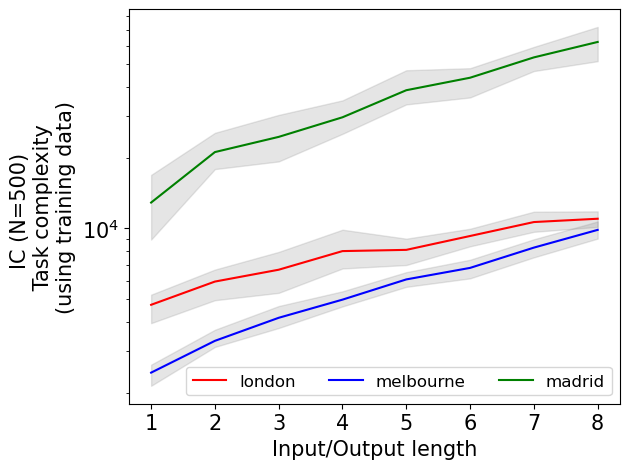

In [39]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    

    for CSR_type in [
    'CSR_PM_sum_y_exceeding_r_x_max',
        ]:

        cityname = city.lower()

        city_label_printed = []      
        
        for_mean = []
        for run_count in range(1, 9):
            x_axis = []
            y_axis = []
            os.system("grep \'for_parser:\' stochasticity_N_500_cx/complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_" + str(run_count) + ".txt | sed \"s/for_parser:,//g\" > stochasticity_N_500_cx/parsed_file.csv")
            df = pd.read_csv("stochasticity_N_500_cx/parsed_file.csv", names=["cityname","i_o_length","prediction_horizon","grid_size","thresh","config_cx_sample_whole_data","CSR_MP_no_thresh_mean","CSR_MP_no_thresh_median","CSR_MP_count_y_exceeding_r_x","CSR_MP_sum_y_exceeding_r_x_max","CSR_MP_sum_y_exceeding_r_x_mean","CSR_MP_sum_exp_y_exceeding_r_x_mean","CSR_MP_no_thresh_frac_mean_2","CSR_MP_no_thresh_frac_mean_2_exp","CSR_MP_no_thresh_frac_sum","CSR_PM_no_thresh_mean","CSR_PM_no_thresh_median","CSR_PM_count_y_exceeding_r_x","CSR_PM_sum_y_exceeding_r_x_max","CSR_PM_sum_y_exceeding_r_x_mean","CSR_PM_sum_exp_y_exceeding_r_x_mean","CSR_PM_no_thresh_frac_mean_2","CSR_PM_no_thresh_frac_mean_2_exp","CSR_PM_no_thresh_frac_sum","CSR_NM_no_thresh_mean","CSR_NM_no_thresh_median","CSR_NM_count_y_exceeding_r_x","CSR_NM_sum_y_exceeding_r_x_max","CSR_NM_sum_y_exceeding_r_x_mean","CSR_NM_sum_exp_y_exceeding_r_x_mean","CSR_NM_no_thresh_frac_mean_2","CSR_NM_no_thresh_frac_mean_2_exp","CSR_NM_no_thresh_frac_sum","CSR_GB_no_thresh_mean","CSR_GB_no_thresh_median","CSR_GB_count_y_exceeding_r_x","CSR_GB_sum_y_exceeding_r_x_max","CSR_GB_sum_y_exceeding_r_x_mean","CSR_GB_sum_exp_y_exceeding_r_x_mean","CSR_GB_no_thresh_frac_mean_2","CSR_GB_no_thresh_frac_mean_2_exp","CSR_GB_no_thresh_frac_sum", "CSR_GB_red_by_grey_sum","CSR_NM_red_by_grey_sum","CSR_PM_red_by_grey_sum","CSR_MP_red_by_grey_sum"])        

            for scale in config.scales_def:
                for i_o_length in config.i_o_lengths:
                    for pred_horiz in config.pred_horiz_def:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only one star even if multiple present, uncomment below:
                        range_ = [0]

                        for i in range_:
                            # if cityname in city_label_printed:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',color=city_color[cityname], alpha=1)
                            # else:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                            #     city_label_printed.append(cityname)                            
                            x_axis.append(i_o_length)                            
                            y_axis.append(filtered_rows.iloc[i][CSR_type] / 500)
            for_mean.append(y_axis)
        mean_y_axis = np.mean(np.array(for_mean), axis=0)
        min_y_axis = np.min(np.array(for_mean), axis=0)
        max_y_axis = np.max(np.array(for_mean), axis=0)        

        plt.plot(x_axis, mean_y_axis, label=cityname , color=city_color[cityname])                 
        # plt.plot(x_axis, max_y_axis)                 
        # plt.plot(x_axis, min_y_axis)  
        plt.fill_between(x_axis, min_y_axis, max_y_axis, alpha=0.2, color="gray")

plt.xlabel("Input/Output length", fontsize=15)
plt.ylabel("IC (N=500) \n Task complexity \n(using training data)", fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", fontsize=12, ncol=3, labelspacing=0.2)
plt.tight_layout()
# plt.gca().set_aspect(30)
plt.savefig("cx-stochasticity-io.png")
plt.show()





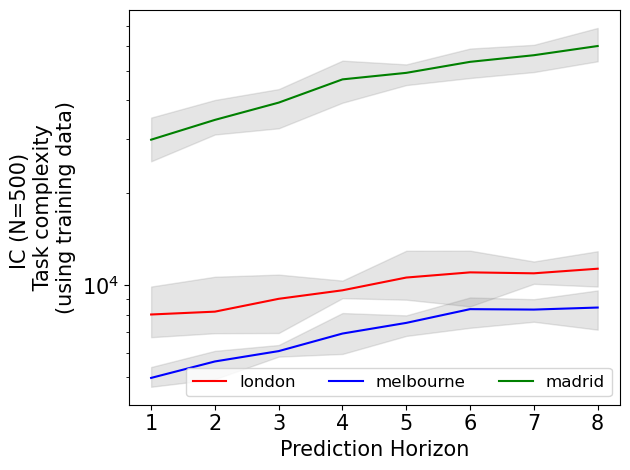

In [40]:
import pandas as pd

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales
for city in config.city_list:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []
    

    for CSR_type in [
    'CSR_PM_sum_y_exceeding_r_x_max',
        ]:

        cityname = city.lower()

        city_label_printed = []      
        
        for_mean = []
        for run_count in range(1, 9):
            x_axis = []
            y_axis = []
            os.system("grep \'for_parser:\' stochasticity_N_500_cx/complexity_results_all_cities_io_4_wide_margin_default_plus_minus_final_with_latest_metrics_run_" + str(run_count) + ".txt | sed \"s/for_parser:,//g\" > stochasticity_N_500_cx/parsed_file.csv")
            df = pd.read_csv("stochasticity_N_500_cx/parsed_file.csv", names=["cityname","i_o_length","prediction_horizon","grid_size","thresh","config_cx_sample_whole_data","CSR_MP_no_thresh_mean","CSR_MP_no_thresh_median","CSR_MP_count_y_exceeding_r_x","CSR_MP_sum_y_exceeding_r_x_max","CSR_MP_sum_y_exceeding_r_x_mean","CSR_MP_sum_exp_y_exceeding_r_x_mean","CSR_MP_no_thresh_frac_mean_2","CSR_MP_no_thresh_frac_mean_2_exp","CSR_MP_no_thresh_frac_sum","CSR_PM_no_thresh_mean","CSR_PM_no_thresh_median","CSR_PM_count_y_exceeding_r_x","CSR_PM_sum_y_exceeding_r_x_max","CSR_PM_sum_y_exceeding_r_x_mean","CSR_PM_sum_exp_y_exceeding_r_x_mean","CSR_PM_no_thresh_frac_mean_2","CSR_PM_no_thresh_frac_mean_2_exp","CSR_PM_no_thresh_frac_sum","CSR_NM_no_thresh_mean","CSR_NM_no_thresh_median","CSR_NM_count_y_exceeding_r_x","CSR_NM_sum_y_exceeding_r_x_max","CSR_NM_sum_y_exceeding_r_x_mean","CSR_NM_sum_exp_y_exceeding_r_x_mean","CSR_NM_no_thresh_frac_mean_2","CSR_NM_no_thresh_frac_mean_2_exp","CSR_NM_no_thresh_frac_sum","CSR_GB_no_thresh_mean","CSR_GB_no_thresh_median","CSR_GB_count_y_exceeding_r_x","CSR_GB_sum_y_exceeding_r_x_max","CSR_GB_sum_y_exceeding_r_x_mean","CSR_GB_sum_exp_y_exceeding_r_x_mean","CSR_GB_no_thresh_frac_mean_2","CSR_GB_no_thresh_frac_mean_2_exp","CSR_GB_no_thresh_frac_sum", "CSR_GB_red_by_grey_sum","CSR_NM_red_by_grey_sum","CSR_PM_red_by_grey_sum","CSR_MP_red_by_grey_sum"])        

            for scale in config.scales_def:
                for i_o_length in config.i_o_lengths_def:
                    for pred_horiz in config.pred_horiz:
                        filtered_rows = df[    \
                                           (df["i_o_length"]==i_o_length) & \
                                           (df["grid_size"]==scale) & \
                                           (df["prediction_horizon"]==pred_horiz) &\
                                           (df["cityname"]==cityname)
                                          ]
                        if filtered_rows.shape[0] == 1:
                            range_ = [0]
                        else:
                            range_ = list(range(filtered_rows.shape[0]))
                            # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                            # no worries, will be plotted multiple times # this is three times because of first combination overlap

                        # if printing only one star even if multiple present, uncomment below:
                        range_ = [0]

                        for i in range_:
                            # if cityname in city_label_printed:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',color=city_color[cityname], alpha=1)
                            # else:
                            #     plt.scatter(scale,  filtered_rows.iloc[i][CSR_type] / 500, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                            #     city_label_printed.append(cityname)                            
                            x_axis.append(pred_horiz)                            
                            y_axis.append(filtered_rows.iloc[i][CSR_type] / 500)
            for_mean.append(y_axis)
        mean_y_axis = np.mean(np.array(for_mean), axis=0)
        min_y_axis = np.min(np.array(for_mean), axis=0)
        max_y_axis = np.max(np.array(for_mean), axis=0)        

        plt.plot(x_axis, mean_y_axis, label=cityname , color=city_color[cityname])                 
        # plt.plot(x_axis, max_y_axis)                 
        # plt.plot(x_axis, min_y_axis)  
        plt.fill_between(x_axis, min_y_axis, max_y_axis, alpha=0.2, color="gray")

plt.xlabel("Prediction Horizon", fontsize=15)
plt.ylabel("IC (N=500) \n Task complexity \n(using training data)", fontsize=15)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc="lower right", fontsize=12, ncol=3, labelspacing=0.2)
plt.tight_layout()
# plt.gca().set_aspect(30)
plt.savefig("cx-stochasticity-pred_horiz.png")
plt.show()





In [43]:
# If using "PM_complexity_results_all_cities_io_4_standard_wide_margins.csv"

# The mean needs to be multiplied with the counts to get the sum as shown below: (Since at that time we were computing the mean instead of the sum)

                    # for i in range_:
                    #     if cityname in city_label_printed:
                    #         plt.scatter(pred_horiz,  filtered_rows.iloc[i][CSR_type] * filtered_rows.iloc[i]["CSR_PM_count_y_exceeding_r_x"]/100, marker='*',color=city_color[cityname], alpha=1)
                    #     else:
                    #         plt.scatter(pred_horiz,  filtered_rows.iloc[i][CSR_type] * filtered_rows.iloc[i]["CSR_PM_count_y_exceeding_r_x"]/100, marker='*',label=cityname + "-cx-train", alpha=1, color=city_color[cityname])
                    #         city_label_printed.append(cityname)
                            


GIGO case:  melbourne-1-1-55-
GIGO case:  melbourne-2-1-55-
GIGO case:  madrid-4-1-25-
GIGO case:  madrid-4-1-45-
GIGO case:  madrid-1-1-55-
GIGO case:  madrid-7-1-55-
GIGO case:  madrid-8-1-55-


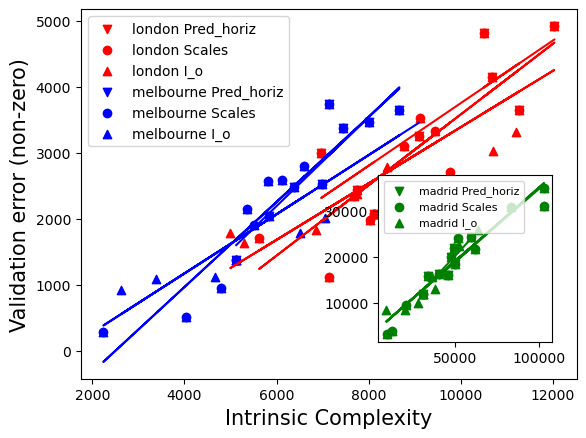

In [109]:
# ! pip install scikit-learn

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


fig, axes = plt.subplots(1,1)



city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}

# scales

CSR_type = 'CSR_PM_sum_y_exceeding_r_x_max'

for city in config.city_list[:2]:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []

    val_error_list_scatter = [] 
    complexity_error_list_scatter = []   
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz:
                
              
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()

           
    axes.scatter(x, y, color=city_color[cityname], label=city + " Pred_horiz", marker='v')
    axes.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='*')
    # plt.plot(x, y_pred, label=city + " Pred_horiz", color=city_color[cityname])   
    
    for scale in config.scales: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()                
                
    axes.scatter(x, y, color=city_color[cityname], label=city + " Scales", marker='o')
    axes.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='v')
    # plt.plot(x, y_pred,  '-.',label=city + " Scales", color=city_color[cityname])   
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths:
            for pred_horiz in config.pred_horiz_def:
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()                                

            # Scatter plot with fitted line
    axes.scatter(x, y, color=city_color[cityname], label=city + " I_o", marker='^')
    axes.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='^', color=city_color[cityname])
    # plt.plot(x, y_pred, '--', label=city + " I_o", color=city_color[cityname])   


           
####################################################################################### 
################# THIRD CITY; INSET plot    
ins = axes.inset_axes([0.6,0.1,0.35,0.45])
    
for city in config.city_list[2:3]:

    cityname = city.lower()

    city_label_printed = []

    val_loss_non_zero_list = []
    csr_model_list = []
    csr_PM_list = []
    csr_PM_frac_list = []

    val_error_list_scatter = [] 
    complexity_error_list_scatter = []   
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz:
                
              
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()


    ins.scatter(x, y, color=city_color[cityname], label=city + " Pred_horiz", marker='v')
    ins.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='*')
    # plt.plot(x, y_pred, label=city + " Pred_horiz", color=city_color[cityname])   
    
    for scale in config.scales: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths_def:
            for pred_horiz in config.pred_horiz_def:
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()                
                
    ins.scatter(x, y, color=city_color[cityname], label=city + " Scales", marker='o')
    ins.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='v')
    # plt.plot(x, y_pred,  '-.',label=city + " Scales", color=city_color[cityname])   
    
    for scale in config.scales_def: #list(range(25, 206, 30))[::-1] + 
        for i_o_length in config.i_o_lengths:
            for pred_horiz in config.pred_horiz_def:
                
                prefix = ProcessRaw.file_prefix(cityname=cityname,
                                                io_length=i_o_length, 
                                                pred_horiz=pred_horiz, 
                                                scale=scale)
                filename = "val_csv_" + prefix + ".csv"
                try:
                    df = pd.read_csv(os.path.join("val_csv_all_models_all_cities", filename))
                except (pd.errors.EmptyDataError, FileNotFoundError) as e:
                    print (cityname, " Empty/Not found, ignoring; plot will be missing")
                    print (e)
                    continue
                    
                    
                epoch_list = df.epoch.tolist()
                val_loss = df.val_loss.tolist()
                naive_model= df["naive-model-non-zero"].tolist()
                val_non_zero_mse = df["val_non_zero_mse"].tolist()

                min_val_mse = 999999999999999
                min_val_mse_non_zero = 999999999999999
                for early_stopping in range(1, min(7, len(val_loss))):  # if there were less than 7 epochs (later early stopping changed to 3; that's why)
                    min_val_mse = min (min_val_mse, val_loss[-early_stopping])
                    min_val_mse_non_zero = min (min_val_mse_non_zero, val_non_zero_mse[-early_stopping])

                alpha = 1
                facecolor = city_color[cityname]
                
                if naive_model[-1] < min_val_mse_non_zero:
                    # invalid, GIGO regime
                    print ("GIGO case: ", prefix)                    
                    
                    facecolor='none'
                    
                    # continue                    
                    


                val_error_list_scatter.append(min_val_mse_non_zero)
                

                city_label_printed_csr = []
                df = pd.read_csv("PM_complexity_results_all_cities_io_4_standard_wide_margins_run_1.csv")        


                filtered_rows = df[    \
                                   (df["i_o_length"]==i_o_length) & \
                                   (df["grid_size"]==scale) & \
                                   (df["prediction_horizon"]==pred_horiz) &\
                                   (df["cityname"]==cityname)
                                  ]
                if filtered_rows.shape[0] == 1:
                    range_ = [0]
                else:
                    range_ = list(range(filtered_rows.shape[0]))
                    # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                    # no worries, will be plotted multiple times # this is three times because of first combination overlap
     
                complexity_error_list_scatter.append(filtered_rows.iloc[i][CSR_type]/500)
                


                # Sample input data
                x = complexity_error_list_scatter
                y = val_error_list_scatter

                # Convert lists to numpy arrays and reshape
                x = np.array(x).reshape(-1, 1)
                y = np.array(y).reshape(-1, 1)

                # Fit linear regression model
                model = LinearRegression()
                model.fit(x, y)

                # Predict y-values using the fitted model
                y_pred = model.predict(x)

                # Compute the residuals
                residuals = y - y_pred

                # Residual plot
                # plt.scatter(y_pred, residuals, color='blue')
                # plt.axhline(y=0, color='red', linestyle='--')
                # plt.xlabel('Predicted values')
                # plt.ylabel('Residuals')
                # plt.title('Residual Plot')
                # plt.show()                                

            # Scatter plot with fitted line
    ins.scatter(x, y, color=city_color[cityname], label=city + " I_o", marker='^')
    ins.plot(x, y_pred, color=city_color[cityname]) # , label='Predicted')
    # plt.scatter(x, y, marker='^', color=city_color[cityname])
    # plt.plot(x, y_pred, '--', label=city + " I_o", color=city_color[cityname])   
    
    
plt.xlabel('Intrinsic Complexity', fontsize=15)
plt.ylabel('Validation error (non-zero)', fontsize=15)
# plt.title('Pred horiz')
plt.legend()
ins.legend(fontsize=8)
plt.savefig("regression_plots.png")
plt.show()
# plt.clf()
                
                
                
                
# plt.xlabel("Prediction Horizon", fontsize=15)
# plt.ylabel("Val MSE non-zero and \n Task complexity (training data)", fontsize=15)
# plt.yscale('log')
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.legend(loc="lower right", fontsize=7, ncol=3, labelspacing=0.2)
# plt.tight_layout()
# plt.savefig("pred_horiz_csr_val_combo.png")
# plt.show()





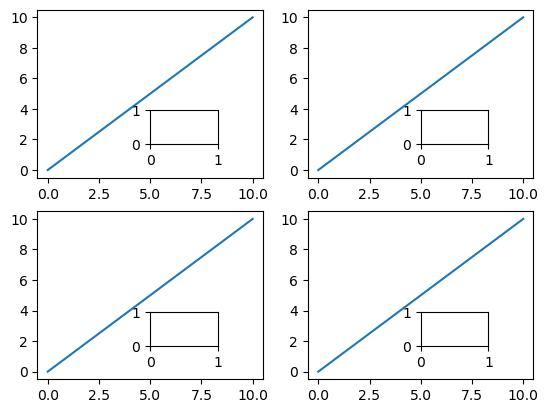

In [100]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,2)

for ax in axes.flat:
    ax.plot(np.arange(11),np.arange(11))

    ins = ax.inset_axes([0.5,0.2,0.3,0.2])

plt.show()